#**Working with Time-series Data: Part II**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)

*Created: January 14, 2019*

In this tutorial, we will work with electrical load data (Wh-min) from CU-BEMS. The data is in one-minute intervals from January 1, 2016 to January 30, 2016. 
We will learn:
* how to import time-series data
* How to change from one-minute resolution to one-hour resolution
* how to fill in missing data (custom)
* how to fill in missing time-series data (using df.interpolate)
* how to "pivot" and "unpivot" a dataframe
* how to visualize time-series data as a heatmap


---



#**1. Import Libraries and Load Time-series Data**

In [0]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

In [0]:
#Import CSV file from Github
# url = 'https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Raw_1Jan16.csv'
# df = pd.read_csv(url)
# df.head()
#notice the columns date/time/power

#To work with time-series data, we want to set date+time as the index column
url = 'https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Raw_1Jan16.csv'
df = pd.read_csv(url, parse_dates={'datetime':['date','time']}, index_col='datetime')
df.head()

,Power
datetime,
2016-01-01 00:00:00,125.0
2016-01-01 00:01:00,125.0
2016-01-01 00:02:00,125.0
2016-01-01 00:03:00,0.0
2016-01-01 00:04:00,125.0


In [0]:
df.info() #now we can see that this DF contains time-series data.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41470 entries, 2016-01-01 00:00:00 to 2016-01-30 23:59:00
Data columns (total 1 columns):
Power    41470 non-null float64
dtypes: float64(1)
memory usage: 648.0 KB


In [0]:
#With time-series data, Python can understand time range.
df['2016-01-02 00:00:00':'2016-01-02 00:05:00']

,Power
datetime,
2016-01-02 00:00:00,250.0
2016-01-02 00:01:00,187.5
2016-01-02 00:02:00,0.0
2016-01-02 00:03:00,125.0
2016-01-02 00:04:00,62.5
2016-01-02 00:05:00,0.0


In [0]:
#We will create a time-series data that has no missing rows.
datetime_index = pd.date_range('2016-01-01 00:00:00', '2016-01-30 23:59:00', freq='1min')
df = df.reindex(datetime_index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43200 entries, 2016-01-01 00:00:00 to 2016-01-30 23:59:00
Freq: T
Data columns (total 1 columns):
Power    41470 non-null float64
dtypes: float64(1)
memory usage: 675.0 KB


In [0]:
#We can extract day, hour, minute from the dataframe index
df['day'] = df.index.day
df['hour'] = df.index.hour
df.head()

,Power,day,hour
2016-01-01 00:00:00,125.0,1,0
2016-01-01 00:01:00,125.0,1,0
2016-01-01 00:02:00,125.0,1,0
2016-01-01 00:03:00,0.0,1,0
2016-01-01 00:04:00,125.0,1,0


In [0]:
#Pivot the table
df1=df.pivot_table(index='day',columns='hour',values='Power', aggfunc=np.sum) #aggfunc, default = np.mean; 
df1=df1.multiply(0.001)#calculate one hour consumption/1000 (kW)
#Delete any data <=0     
df1=df1[df1>0]  
df1

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,4.3005,4.1205,4.0625,4.4375,3.8750,5.6250,3.5000,3.0625,1.3750,1.8750,NaN,NaN,NaN,NaN,0.3750,2.9375,6.9375,9.6250,10.1250,9.7500,10.0000,4.9375,4.0000,4.0625
2,4.3750,4.0625,5.8125,3.8750,3.9375,4.0000,3.4375,4.0000,2.0000,1.3125,1.1250,2.5625,0.3750,NaN,0.6250,3.3125,8.5625,13.3125,11.5625,8.5000,7.3125,5.1250,6.7500,5.1250
3,5.1250,5.3750,4.9375,4.5625,6.6250,4.2500,4.3125,4.0625,1.6250,1.6250,NaN,NaN,NaN,NaN,NaN,2.3125,5.5000,9.1250,9.8750,9.2500,9.7500,5.0000,4.7500,4.8750
4,5.1250,4.8125,6.3125,4.6250,4.5000,6.1250,6.6250,19.1250,21.7500,29.2500,40.1250,41.1875,40.6250,47.3125,50.1875,48.9375,44.1250,33.8750,22.2500,12.6250,8.3750,6.6250,7.1875,5.4375
5,5.4375,5.3125,5.3125,5.1250,5.5625,4.0000,4.6875,22.3125,38.3125,49.2500,60.3125,66.7500,65.6250,61.0625,47.0625,32.8125,37.6875,31.6250,27.7500,10.5625,7.8750,6.9375,6.5625,9.1250
6,7.1875,6.4375,6.0625,5.6250,7.5625,5.5625,5.6250,14.3125,26.6250,27.1875,33.9375,39.8125,39.1250,49.1250,50.3125,40.6875,40.0000,35.0000,20.6250,10.2500,9.1250,7.9375,6.8125,5.2500
7,5.5000,5.6875,5.1250,7.0625,5.3750,5.1875,6.2500,24.4375,23.7500,36.7500,49.3125,39.8125,39.2500,45.7500,51.3125,43.4375,34.2500,29.2500,23.3125,13.6875,10.8750,8.0000,7.7500,6.2500
8,6.2500,6.0000,5.6875,7.0625,5.3750,5.3750,4.9375,20.1250,29.0000,32.7500,33.5000,32.5000,34.0000,35.6250,28.0000,28.8750,40.7500,36.1250,25.2500,15.0625,10.3125,7.7500,7.3750,6.7500
9,6.5000,7.0000,6.4375,7.8750,6.1875,5.1250,5.6250,4.8750,4.3750,4.2500,1.3750,2.2500,1.0625,NaN,NaN,NaN,6.4375,9.7500,10.0000,10.1250,7.6250,8.0000,9.6250,8.5000


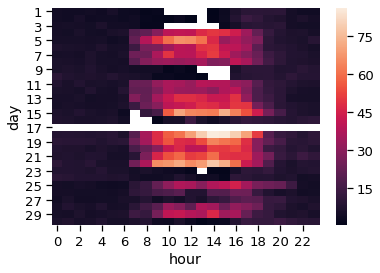

In [0]:
sns.heatmap(df1)

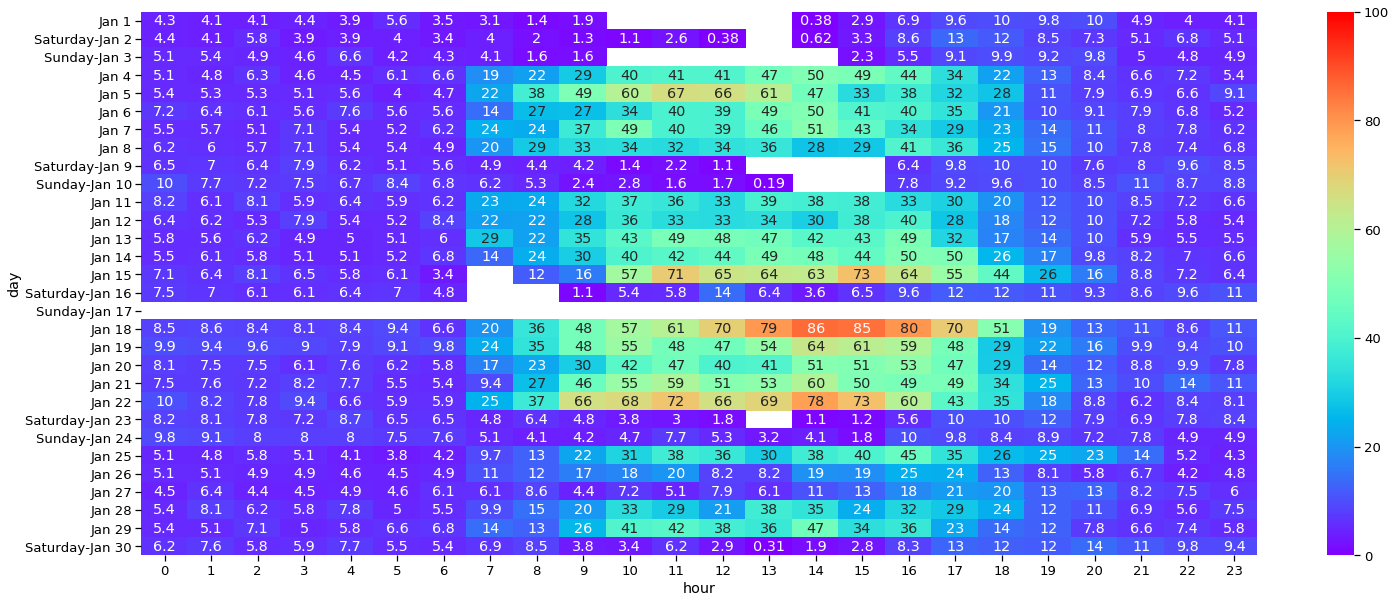

In [0]:
#Heatmap Plot (seaborn)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
snsplt = sns.heatmap(df1, cmap='rainbow', annot=True, vmin=0, vmax=100,
           yticklabels=['Jan 1','Saturday-Jan 2','Sunday-Jan 3','Jan 4','Jan 5','Jan 6','Jan 7','Jan 8','Saturday-Jan 9','Sunday-Jan 10',
                       'Jan 11','Jan 12','Jan 13','Jan 14','Jan 15','Saturday-Jan 16','Sunday-Jan 17','Jan 18','Jan 19','Jan 20',
                       'Jan 21','Jan 22','Saturday-Jan 23','Sunday-Jan 24','Jan 25','Jan 26','Jan 27','Jan 28','Jan 29','Saturday-Jan 30']) 
#cmap reference: https://matplotlib.org/examples/color/colormaps_reference.html  



---
#**2. Fill Missing (non-times series) Data**


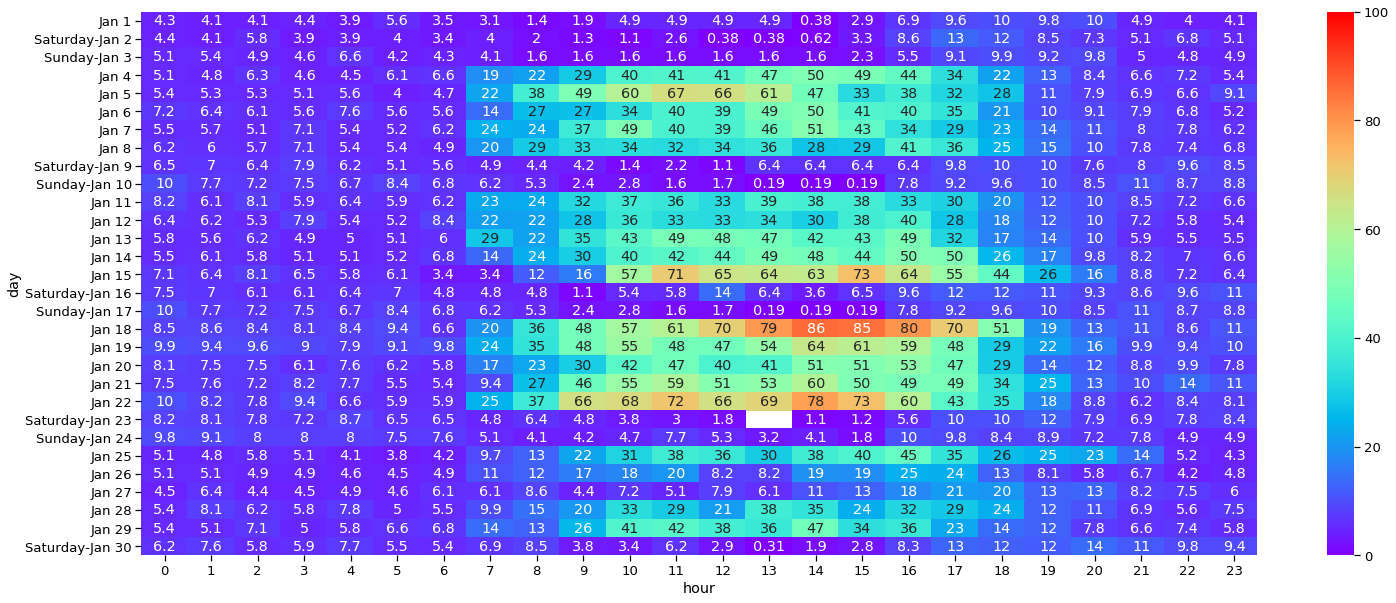

In [0]:
#Fill missing data for non-times series data
df1.iloc[0,:].fillna(value=df1.iloc[0,:].mean(), inplace=True)
df1.iloc[1,:].fillna(value=df1.iloc[1,:].min(), inplace=True)
df1.iloc[2,:].fillna(method='ffill', inplace=True)
df1.iloc[8,:].fillna(method='bfill', inplace=True)
df1.iloc[9,:].fillna(method='pad', inplace=True)
df1.iloc[14,:].fillna(method='pad', inplace=True)
df1.iloc[15,:].fillna(method='pad', inplace=True)
df1.iloc[16,:].fillna(value=df1.iloc[9,:], inplace=True)
df1.iloc[21,:].fillna(value=df1.iloc[:,0].mean(), inplace=True)
#Heatmap Plot (seaborn)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
snsplt = sns.heatmap(df1, cmap='rainbow', annot=True, vmin=0, vmax=100,
           yticklabels=['Jan 1','Saturday-Jan 2','Sunday-Jan 3','Jan 4','Jan 5','Jan 6','Jan 7','Jan 8','Saturday-Jan 9','Sunday-Jan 10',
                       'Jan 11','Jan 12','Jan 13','Jan 14','Jan 15','Saturday-Jan 16','Sunday-Jan 17','Jan 18','Jan 19','Jan 20',
                       'Jan 21','Jan 22','Saturday-Jan 23','Sunday-Jan 24','Jan 25','Jan 26','Jan 27','Jan 28','Jan 29','Saturday-Jan 30']) 
#cmap reference: https://matplotlib.org/examples/color/colormaps_reference.html  

In [0]:
#unpivot the table 
df2 = df1.stack().reset_index(name='Wh')

# reformat to make the datetime = index column
df2['year']=2016
df2['month']=1
df2['datetime'] = pd.to_datetime(df2[['day','month','year','hour']])
df2.set_index('datetime', inplace=True)
df2.drop(['day','hour','year','month'], axis=1, inplace=True)

#get the new df after cleaning the data
df2

,Wh
datetime,
2016-01-01 00:00:00,4.3005
2016-01-01 01:00:00,4.1205
2016-01-01 02:00:00,4.0625
2016-01-01 03:00:00,4.4375
2016-01-01 04:00:00,3.8750
...,...
2016-01-30 19:00:00,12.0000
2016-01-30 20:00:00,13.9375
2016-01-30 21:00:00,11.4375




---


#**3. Fill Missing Time-series Data (using pd.interpolate)**

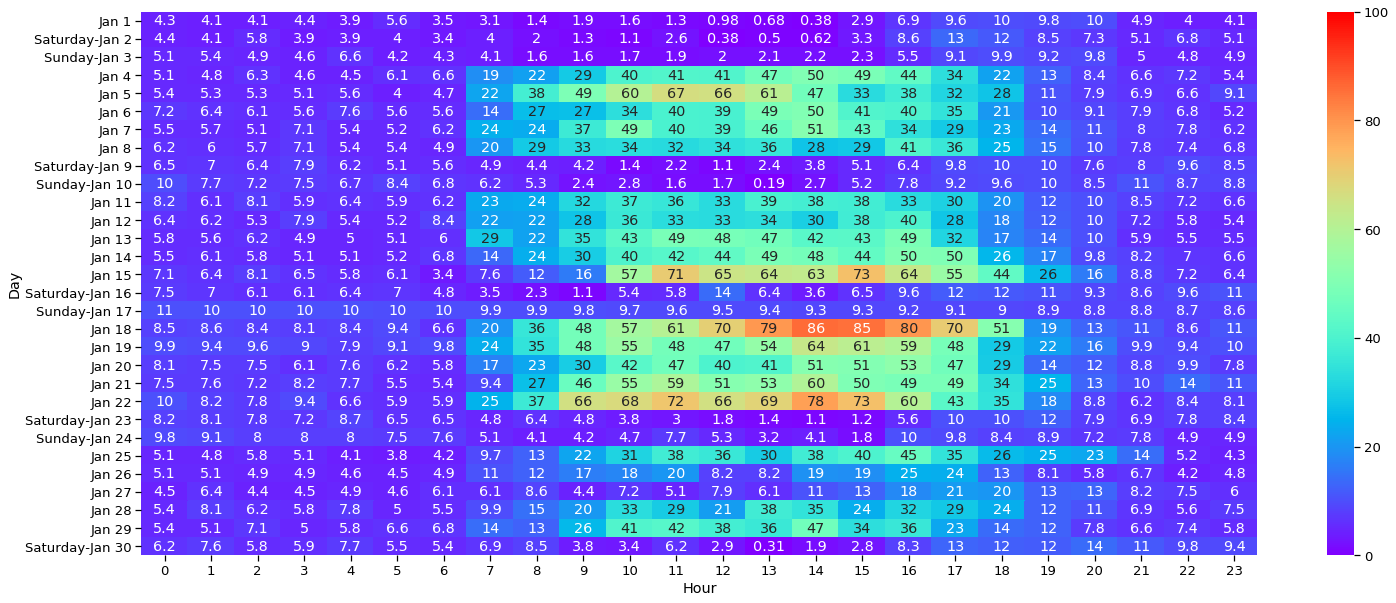

In [0]:
#To work with time-series data, we want to set date+time as the index column
url = 'https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Raw_1Jan16.csv'
df = pd.read_csv(url, parse_dates={'datetime':['date','time']}, index_col='datetime')

#We will create a time-series data that has no missing rows.
datetime_index = pd.date_range('2016-01-01 00:00:00', '2016-01-30 23:59:00', freq='1min')
df = df.reindex(datetime_index)

#we will resample data into one hour intervals
data=df.resample('60T').sum() #sum of Wh
data=data.multiply(0.001) #make it kWh

#we will mark any negative or zero values as missing
data=data[data>0]

#for missing data, we will interpolate
data.interpolate(method='linear', inplace=True) #<==============

#we will add day and hour index, and do the heatmap plot
data['Day'] = data.index.day
data['Hour'] = data.index.hour
data1=data.pivot_table(index='Day',columns='Hour',values='Power', aggfunc=np.sum)
data1=data1[data1>0]

#Heatmap Plot (seaborn)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
snsplt = sns.heatmap(data1, cmap='rainbow', annot=True, vmin=0, vmax=100,
           yticklabels=['Jan 1','Saturday-Jan 2','Sunday-Jan 3','Jan 4','Jan 5','Jan 6','Jan 7','Jan 8','Saturday-Jan 9','Sunday-Jan 10',
                       'Jan 11','Jan 12','Jan 13','Jan 14','Jan 15','Saturday-Jan 16','Sunday-Jan 17','Jan 18','Jan 19','Jan 20',
                       'Jan 21','Jan 22','Saturday-Jan 23','Sunday-Jan 24','Jan 25','Jan 26','Jan 27','Jan 28','Jan 29','Saturday-Jan 30']) 

In [0]:
snsplt.figure.savefig("output.png")